In [2]:
# Estos dos comandos evitan que haya que hacer reload cada vez que se modifica un paquete
%load_ext autoreload
%autoreload 2

# Ejemplo de distintos datasets y Naive Bayes

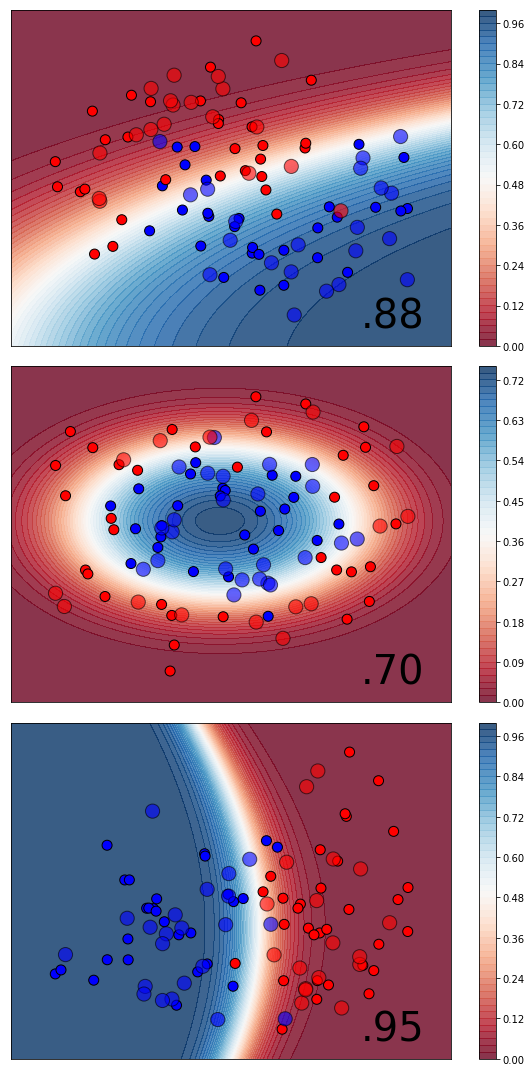

In [3]:
import numpy as np
from problema_2 import plot_boundaries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.naive_bayes import GaussianNB

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]


figure = plt.figure(figsize=(8, 15))
# iterate over datasets
name = "Naive Bayes"

for position, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    ax = plt.subplot(len(datasets), 1, position+1)
    plot_boundaries(X_train, X_test, y_train, y_test, score, clf.predict_proba, ax=ax)
    

plt.tight_layout()
plt.show()